In [137]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split

In [138]:
# current directory
cwd = os.getcwd()


In [139]:
# path to images
path = cwd+'/animals/'

In [140]:
# animal categories
categories = ['dogs', 'panda', 'cats']

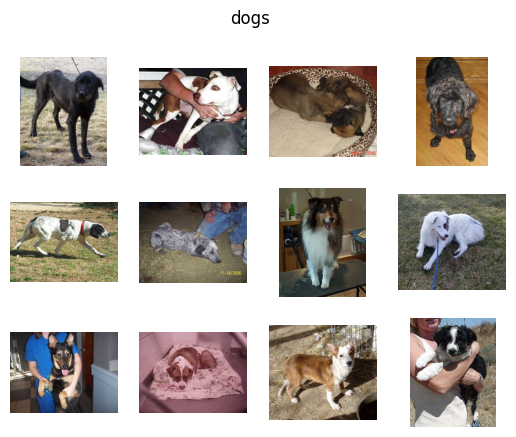

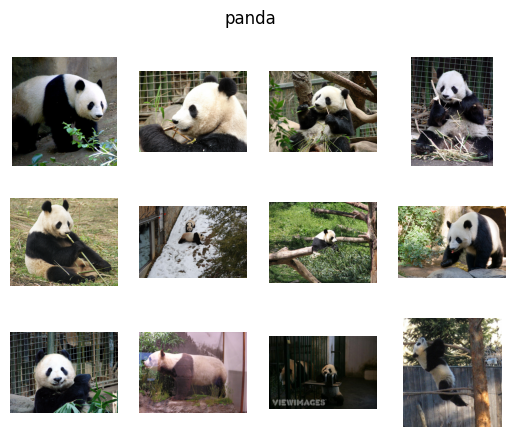

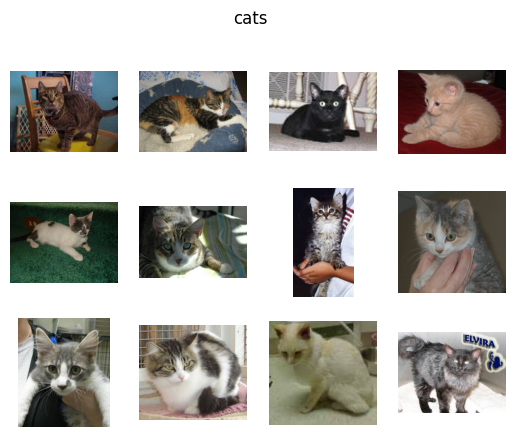

In [141]:
# let's display some of the pictures

for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    fig.patch.set_facecolor('xkcd:white')
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()


In [142]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

dogs  => height min :  50 width min :  59
dogs  => height max :  500 width max :  500
panda  => height min :  87 width min :  78
panda  => height max :  1200 width max :  1600
cats  => height min :  32 width min :  55
cats  => height max :  500 width max :  500


# 3. Preprocess data and label inputs

In [ ]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k]) # k=0 : 'dogs', k=1 : 'panda', k=2 : 'cats'

import random
random.shuffle(imagePaths)


# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0

# data = np.array(data, dtype="float") 
# mean_image = np.mean(data, axis=0)
# data -= mean_image

labels = np.array(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)
trainX= np.reshape(trainX, (trainX.shape[0], -1))
testX = np.reshape(testX, (testX.shape[0], -1))

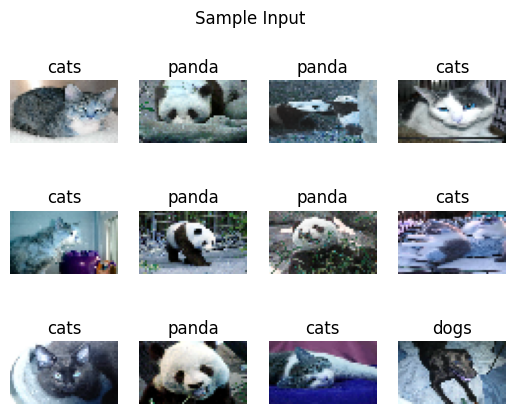

In [144]:
# Let's check everything is ok
fig, _ = plt.subplots(3,4)
fig.suptitle("Sample Input")
fig.patch.set_facecolor('xkcd:white')
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

# One Hot encoder

In [145]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(trainX, trainY)

NuSVC()

In [146]:
# Preprocess class labels



print(testX.shape)
print(testY.shape)

(600, 5280)
(600,)


C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\1369494560.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\1369494560.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


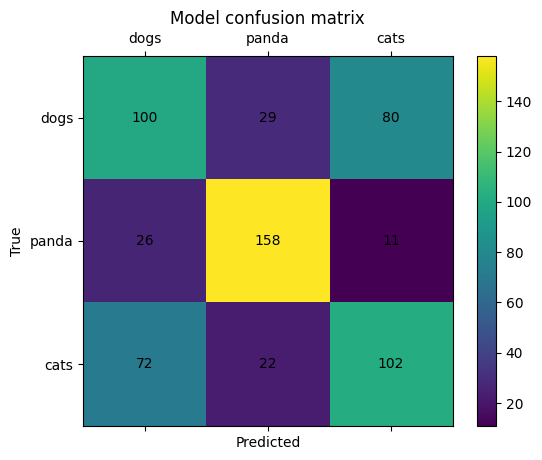

Accuracy : 60.00%


In [147]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(testX)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\4251750277.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\4251750277.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


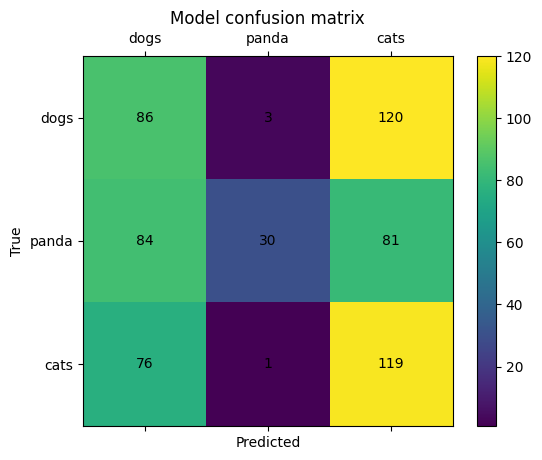

Accuracy : 39.17%


In [148]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(trainX, trainY)
pred = neigh.predict(testX)

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [149]:
trainX = trainX.reshape(trainX.shape[0],32, 55, 3)
testX = testX.reshape(testX.shape[0],32, 55, 3)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2400, 32, 55, 3)
(600, 32, 55, 3)
(2400,)
(600,)


## Hog

In [150]:
from skimage.color import rgb2gray
ppc = 16
hog_images = []
hog_features = []
for image in trainX:
    
    image = rgb2gray(image)
#    image = data.astronaut()
    


    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=False)
    hog_features.append(fd)

C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\1421613222.py:12: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


In [151]:
train_hog=np.array(hog_features)
print(train_hog.shape)

(2400, 48)


In [152]:
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(train_hog, trainY)

NuSVC()

In [153]:
ppc = 16
hog_images = []
hog_features_t = []
for image in testX:
    
    image = rgb2gray(image)
#    image = data.astronaut()
    

    fd_test, hog_image_test = hog(image, orientations=8, pixels_per_cell=(16, 16),
                        cells_per_block=(1, 1), visualize=True, multichannel=False)
    hog_features_t.append(fd_test)

C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\3319022393.py:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_test, hog_image_test = hog(image, orientations=8, pixels_per_cell=(16, 16),


C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\2565705288.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + categories)
C:\Users\SHAHEER\AppData\Local\Temp\ipykernel_13212\2565705288.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + categories)


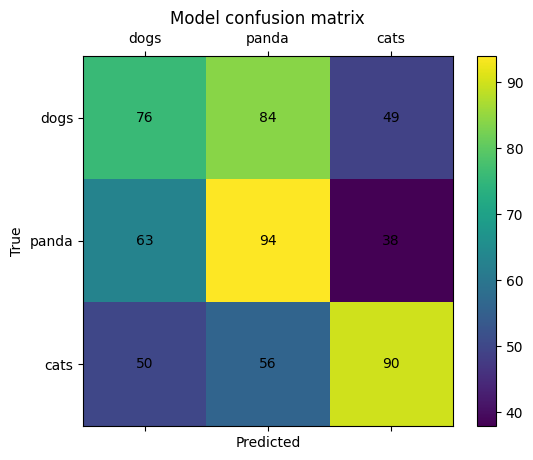

Accuracy : 43.33%


In [154]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = clf.predict(hog_features_t)
# print(pred)
# predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, pred)

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, pred)
print("Accuracy : %.2f%%" % (accuracy*100.0))

In [156]:
images = []
for i in range(len(data)):
    image = cv2.imread(data['path'][i],0)
    image = cv2.resize(image, (256, 256)) 
    images.append(image)
len(images)
# random.shuffle(images)
# Converting to Numpy Array    
x = np.array(images)
y = np.array(data['label'])

trainX, testX, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

## Orb

In [157]:

ppc = 16
hog_images = []
hog_features = []
for image in trainX:
    
    # image = rgb2gray(image)
#    image = data.astronaut()
    

    # print(image.shape)
    kp = orb.detect(image)
    kp,des = orb.compute(image,kp)
    hog_features.append(des.flatten())
ppc = 16
hog_images = []
hog_features_t = []
orb = cv2.ORB_create(80)
for image in testX:
    
    # image = rgb2gray(image)
#    image = data.astronaut()
    

    kp = orb.detect(image)
    kp,des = orb.compute(image,kp)
    hog_features_t.append(des.flatten())

In [158]:
def PaddingLength():
    lenTrain = []
    for img in hog_features:
        lenTrain.append(len(img))
    lenTest = []
    for img in hog_features_t:
        lenTest.append(len(img))
    trainMaxLength = np.max(lenTrain)
    testMaxLength = np.max(lenTest)
    print("max length of train features: ",trainMaxLength)
    print("max length of test features: ",testMaxLength)
    print("we'll choose ",trainMaxLength," as our base length")
    for index,img in enumerate(hog_features):
        arrPad = trainMaxLength -  len(img)
        hog_features[index] = np.pad(img, (0,arrPad), 'constant', constant_values=0)
    for index,img in enumerate(hog_features_t):
        arrPad = trainMaxLength -  len(img)
        hog_features_t[index] = np.pad(img, (0,arrPad), 'constant', constant_values=0)

In [163]:
PaddingLength()

max length of train features:  5504
max length of test features:  5376
we'll choose  5504  as our base length


In [160]:
train_hog=np.array(hog_features)
# labels = np.array(y_train)
# print(train_hog.shape)
from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(hog_features, y_train)

NuSVC()

In [161]:

pred = clf.predict(hog_features_t)
accuracy = accuracy_score(y_test, pred)
print('accuracy: ',accuracy)

accuracy:  0.475


## Sift

In [162]:

ppc = 16
hog_images = []
hog_features = []
sift = cv2.SIFT.create(nfeatures = 40)
for image in trainX:
    
    # image = rgb2gray(image)
#    image = data.astronaut()
    

    # print(image.shape)
    kp,des = sift.detectAndCompute(image,None)
    # compute the descriptors with sift
    
    hog_features.append(des.flatten())
ppc = 16
hog_images = []
hog_features_t = []
orb = cv2.ORB_create(80)
for image in testX:
    
    # image = rgb2gray(image)
#    image = data.astronaut()
    

    kp,des = sift.detectAndCompute(image,None)
    hog_features_t.append(des.flatten())

In [164]:

from sklearn import svm
# clf = svm.SVC()
clf = svm.NuSVC()
clf.fit(hog_features, y_train)

NuSVC()

In [165]:

pred = clf.predict(hog_features_t)
accuracy = accuracy_score(y_test, pred)
print('accuracy: ',accuracy)

accuracy:  0.45166666666666666
